# Understanding the Data

Y -> There are 2 targets
 1. ADHD diagnosis (0- None, 1- ADHD)
 2. Sex_F (0- Male, 1 - Female)

X ->
1. Metadata A + B = Socio Demographics Information (Quantitative + Categorical)
- -  A mix of categorical and numerical features (e.g., handedness, education level, parenting info, emotions).
2. Functional MRI Matrices (represents functional connectivity between different brain regions)

- Rows = Participants (Each row corresponds to one subject).
- Columns = Brain Region Pairs (Each value represents the functional connection strength between two regions).
- It is a 199 x 199 symmetric matrix, flattened into a single row per participant.

Combine these 3 for EDA and Model Training.

---

### Data Files

- LABELS: ADHD diagnosis and sex.

---

Others

- Instrument_Description - Description about the types of Tests taken.
- EHQ – Edinburgh Handedness Questionnaire
- APQ –Alabama Parenting Questionnaire
- SDQ – Strength and Difficulties Questionnaire.

I believe these things are for knowledge and may be useful for features development and understanding.

---

The fMRI department has collected functional brain imaging data of
children and adolescents which are available to you together with their socio-demographic, emotions, and parenting information.

As there might be gender-based differences, the task is to build a model to **predict both an
individual’s sex and their ADHD diagnosis**  using this information.

---
Your task is to predict both ADHD diagnosis and sex using functional MRI data and socio-demographic information while ensuring the model is not biased, especially against female patients.

---

# Exploratory Data Analysis (EDA)

✅ Missing data should be handled before checking relationships/correlations.

✅ Normalization/standardization should be done after checking relationships/correlations to avoid distorting the data.

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical Skew Solution
from scipy.stats import yeojohnson

## 1️⃣ Deeper Understanding of Data



✅ Steps:

- Load the dataset (CSV and Excel).
- Check the data structure: Number of rows & columns (df.shape).
- Inspect column names & data types (df.info()).
- Check the first few rows (df.head()).
Look at variable descriptions (refer to data dictionary).

### MetaData A

In [33]:
# For Metadata A (Quantitative)
metadata_a = pd.read_excel("METADATA_A.xlsx")
metadata_a.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [34]:
print(metadata_a.shape)  # Rows & Columns (1213, 19)
print(metadata_a.isnull().sum()) # missing Values

(1213, 19)
participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64


In [35]:
print(metadata_a.info())  # Data types
print(metadata_a.describe()) # Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [36]:
# Check missing values across all columns
missing_values_a = metadata_a.isnull().sum()

missing_columns_a  = missing_values_a[missing_values_a > 0].index
missing_records_dfa = metadata_a[metadata_a[missing_columns_a].isnull().any(axis=1)]

missing_records_dfa.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
5,tBGXkEdv2cp7,83.34,2,5,12,35,16,15,21,4,17,0,12,9,8,5,5,3,NaN
11,6fpygdQTScAW,66.74,13,5,15,40,15,20,25,2,4,0,4,0,2,0,0,10,NaN


### Metadata B

In [37]:
# For Metadata B  (Categorical)
metadata_b = pd.read_excel("METADATA_B.xlsx")
metadata_b.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [38]:
print(metadata_b.shape)  # Rows & Columns (1213, 10)
print(metadata_b.isnull().sum()) # missing Values

(1213, 10)
participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64


In [39]:
print(metadata_b.info())  # Data types
print(metadata_b.describe()) # Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB
None
       Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
count      

In [40]:
# Check missing values across all columns
missing_values_b = metadata_b.isnull().sum()

missing_columns_b  = missing_values_b[missing_values_b > 0].index
missing_records_dfb = metadata_b[metadata_b[missing_columns_b].isnull().any(axis=1)]

missing_records_dfb.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
50,r44YD9eIqJ9u,2016,3,NaN,0,1,21,40,21,0
54,VZnIq2hRErI5,2017,1,NaN,0,2,21,25,18,15
103,cI2963FmxJti,2018,3,NaN,4,3,21,45,18,45
122,SZxlsOgwVT6D,2016,1,NaN,0,1,21,45,12,20
196,LPWm6w5QXeev,2016,1,NaN,0,1,6,0,0,0


### FUNCTIONAL_CONNECTOME_MATRICES

In [41]:
# For Functional MRI Matrices
fmri_matrices = pd.read_csv("FUNCTIONAL_CONNECTOME_MATRICES.csv")
fmri_matrices.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [42]:
print(fmri_matrices.shape)  # Rows & Columns (1213, 19901)
print(fmri_matrices.isnull().sum()) # missing Values

(1213, 19901)
participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64


In [43]:
print(fmri_matrices.info())  # Data types
# print(fmri_matrices.describe()) # Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB
None


In [44]:
missing_values = fmri_matrices.isnull().sum()
missing_values[missing_values > 0]

,0


In [45]:
# Check missing values across all columns
missing_columns  = missing_values[missing_values > 0].index
missing_records_df = fmri_matrices[fmri_matrices[missing_columns].isnull().any(axis=1)]

missing_records_df.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn


In [46]:
print(f"Total rows with missing values: {missing_records_df.shape[0]}") # apXT1ZuI5FLx or jA5iwa9nh8ed

Total rows with missing values: 0


In [47]:
fmri_matrices[fmri_matrices["participant_id"] == "jA5iwa9nh8ed"]

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
80,jA5iwa9nh8ed,0.015019,0.171298,-0.007866,0.026381,0.033539,0.121241,0.123,0.080267,-0.012299,...,0.151905,-0.073514,-0.041812,0.067893,0.027103,0.049518,0.097233,0.163616,0.094943,0.138194


### Labels

In [48]:
targets = pd.read_excel("LABELS.xlsx")
targets.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [49]:
print(targets.shape)  # Rows & Columns (1213, 3)
print(targets.isnull().sum()) # missing Values

(1213, 3)
participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64


In [50]:
print(targets.describe())

       ADHD_Outcome        Sex_F
count   1213.000000  1213.000000
mean       0.685078     0.342951
std        0.464676     0.474891
min        0.000000     0.000000
25%        0.000000     0.000000
50%        1.000000     0.000000
75%        1.000000     1.000000
max        1.000000     1.000000


In [51]:
print(targets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB
None


💡Insights (Missing Values)
- METADATA A  (1213, 19)- MRI_Track_Age_at_Scan - 360
- METADATA B  (1213, 10)- PreInt_Demos_Fam_Child_Ethnicity - 11
- fmri_matrices (1213, 19901) - No record has missing Values
- targets (1213, 3) - No missing values.

- Total Features = 18+9+19900 = 19927 (not including participant_id)
---

## 2️⃣ Data Cleaning & Handling Missing Values

✅ Steps:

- Decide how to handle NaNs:
-- Drop rows (df.dropna()).
-- Fill with mean/median (df.fillna(df.mean())).
-- Fill categorical NaNs with mode (df.fillna(df.mode()[0])).

- Remove duplicates (df.duplicated().sum() → df.drop_duplicates()).

### No Cleaning for Metadata A and B

In [52]:
# # Fill missing values in Metadata A (Quantitative)
# metadata_a['MRI_Track_Age_at_Scan'] = metadata_a['MRI_Track_Age_at_Scan'].fillna(metadata_a['MRI_Track_Age_at_Scan'].median())

# # Fill missing values in Metadata B (Categorical)
# metadata_b['PreInt_Demos_Fam_Child_Ethnicity'] = metadata_b['PreInt_Demos_Fam_Child_Ethnicity'].fillna(3.0) # Filling with unkown float type

# print("MRI_Track_Age_at_Scan missing count:", metadata_a['MRI_Track_Age_at_Scan'].isnull().sum())
# print("PreInt_Demos_Fam_Child_Ethnicity missing count:", metadata_b['PreInt_Demos_Fam_Child_Ethnicity'].isnull().sum())


In [53]:
metadata_a.duplicated().sum()

0

In [54]:
metadata_b.duplicated().sum()

0

In [55]:
fmri_matrices.duplicated().sum()

0

In [56]:
targets.duplicated().sum()

0

## 3️⃣ Feature Understanding & Exploration



### A. Univariate Analysis (Individual Feature Analysis)

📊 For numerical variables:

- Histograms for quantative metadata A.
- Then, BoxPlot to identify the outliers.

📊 For categorical variables:

- Value counts for categorical metadata B.
- Then, CountPlot, to see if some features are so low in counts.

###  A: Histplot and Boxplot for all "Numerical" Features

In [57]:
metadata_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

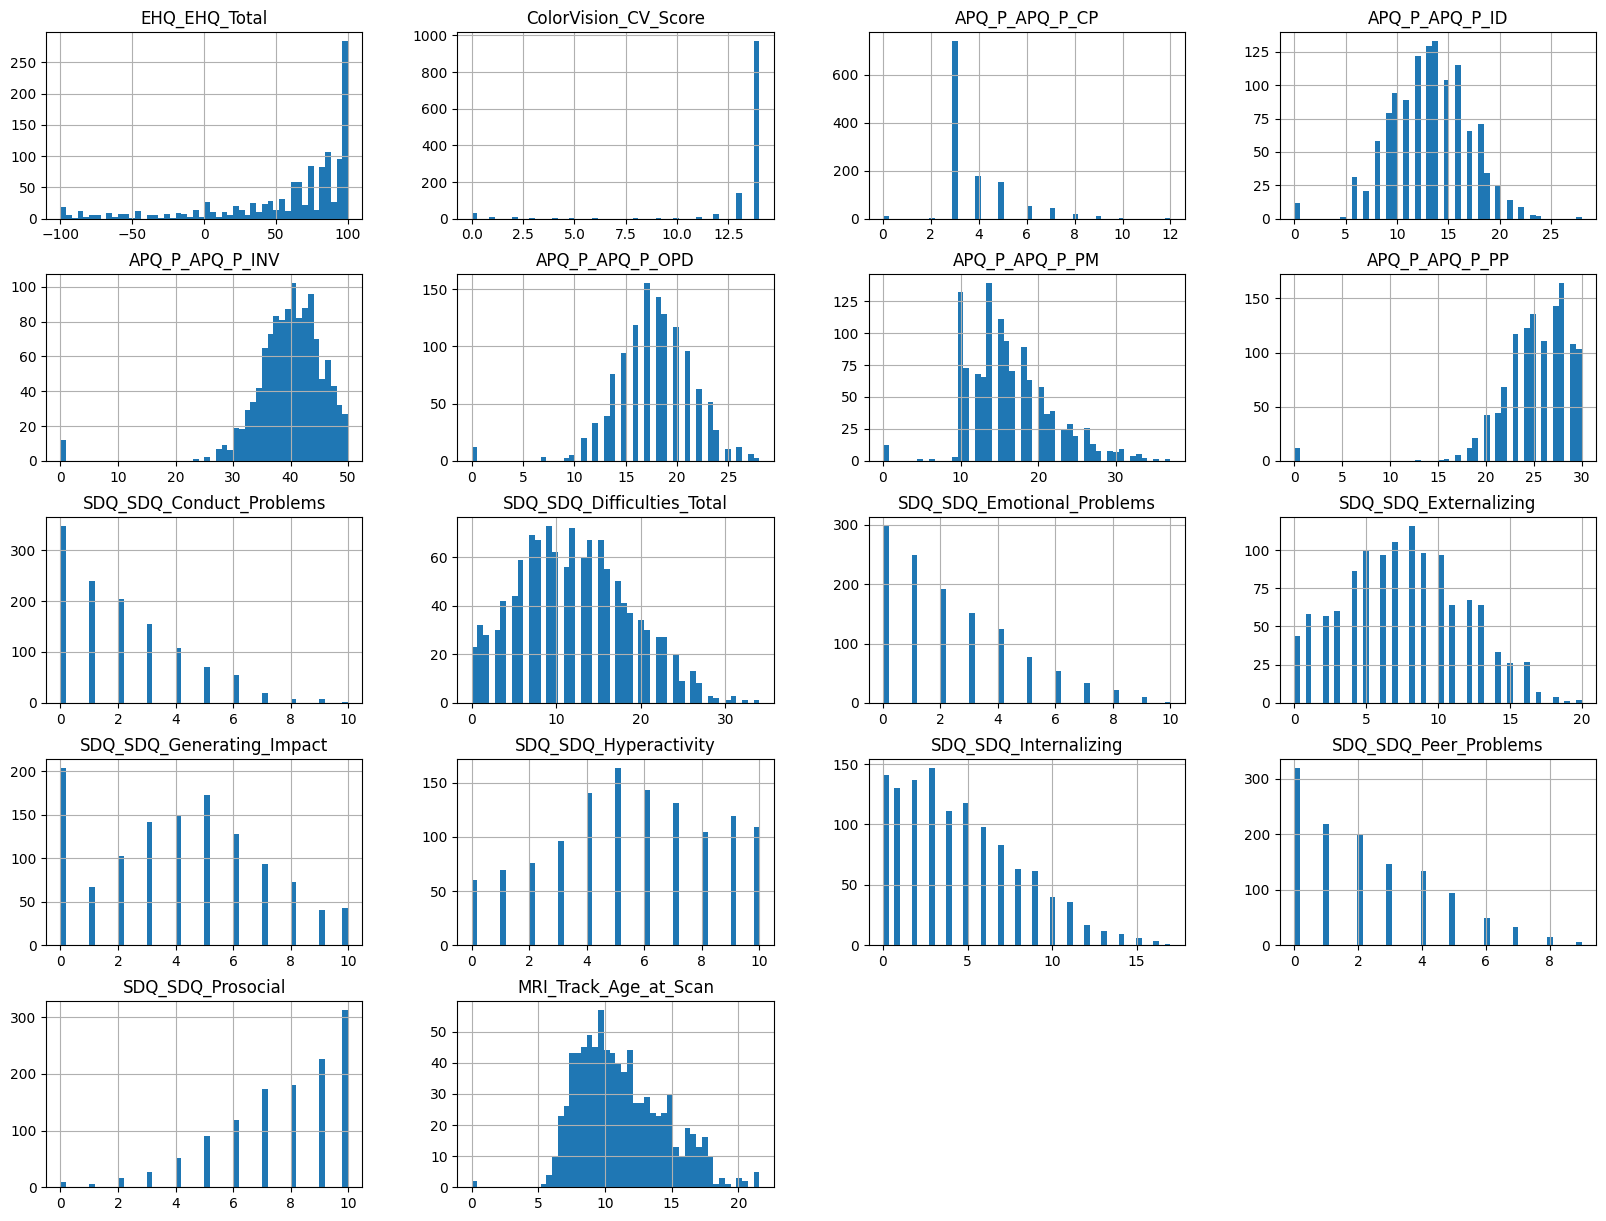

In [58]:
# numerical_cols = metadata_a.select_dtypes(include=['number']).columns

# for col in numerical_cols:
#     plt.figure(figsize=(6,4))
#     sns.histplot(metadata_a[col], bins=30, kde=True)
#     plt.title(f"Distribution of {col}")
#     plt.tight_layout()
#     plt.show()

_ = metadata_a.hist(bins=50, figsize=(20,15))

### Note: Problem: Skewed Distributions

Left Skewed: EHQ, ColorVision, APQ_INV, APQ_PP, SDQ_Prosocial

Right Skewed: APQ_C, APQ_P_PM, Conduct Problems, Emotional Problem, SDQ_Internalizingm Peer Problems

Others are somewhat normally distributed.

Solution: Apply Transformation
To reduce skewness (and outliers) and make the data more normally distributed, I can try different transformations:

- Log Transformation: Helps with right-skewed data (use when values are positive).
- Square Root Transformation: Works for moderate skewness.
- Box-Cox Transformation: Works if all values are positive.
- Yeo-Johnson Transformation: Works even if values include zero or negative values.

Solve this issue if using linear models,
- Linear Regression
- Logistic Regression

No need to solve if using tree based models,
- Desicison Trees
- Random Forest
- XGBoost or
- Deep Learning (use standardization)




In [ ]:
# # Check skewness
# numerical_cols = metadata_a.select_dtypes(include=['int64', 'float64']).columns
# skewness = metadata_a[numerical_cols].skew().sort_values(ascending=False)
# print("Skewness of Numerical Columns:\n", skewness)

# # Select highly skewed columns (threshold > 1)
# highly_skewed = skewness[skewness > 1].index

# # Apply Yeo-Johnson transformation
# metadata_a_transformed = metadata_a.copy()
# for col in highly_skewed:
#     metadata_a_transformed[col], _ = yeojohnson(metadata_a[col])  # No restriction on positive values

# # Visualize the impact
# fig, axes = plt.subplots(len(highly_skewed), 2, figsize=(12, len(highly_skewed) * 4))

# for i, col in enumerate(highly_skewed):
#     sns.histplot(metadata_a[col], bins=50, ax=axes[i, 0])
#     axes[i, 0].set_title(f"Original Distribution: {col}")

#     sns.histplot(metadata_a_transformed[col], bins=50, ax=axes[i, 1])
#     axes[i, 1].set_title(f"Yeo-Johnson Transformed: {col}")

# plt.tight_layout()
# plt.show()

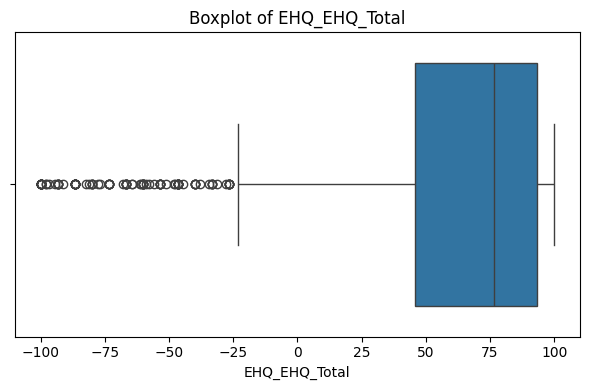

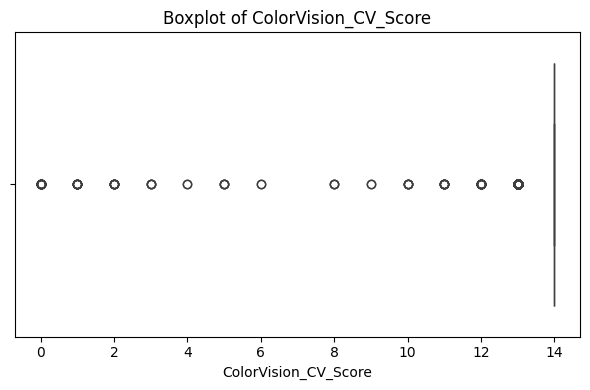

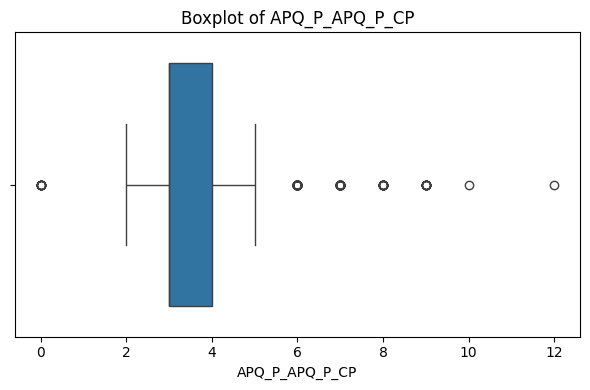

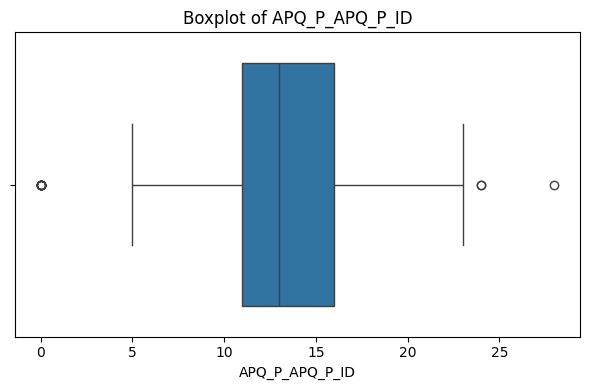

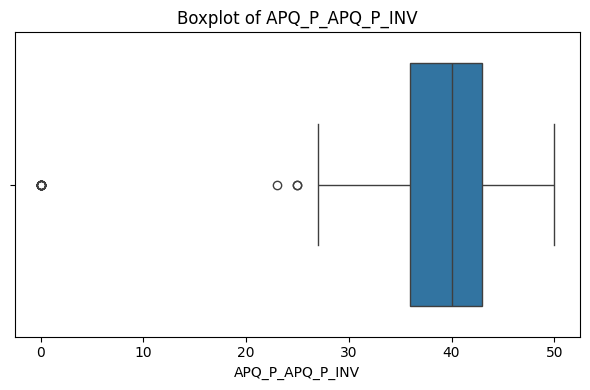

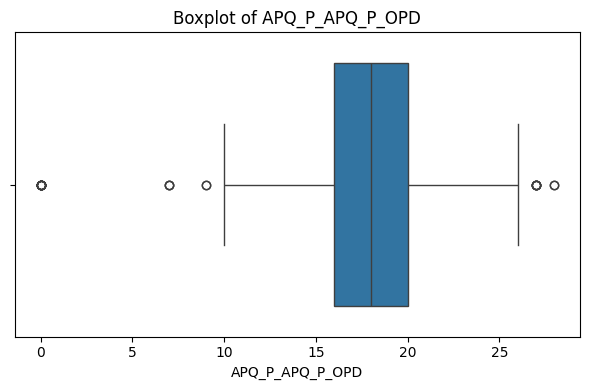

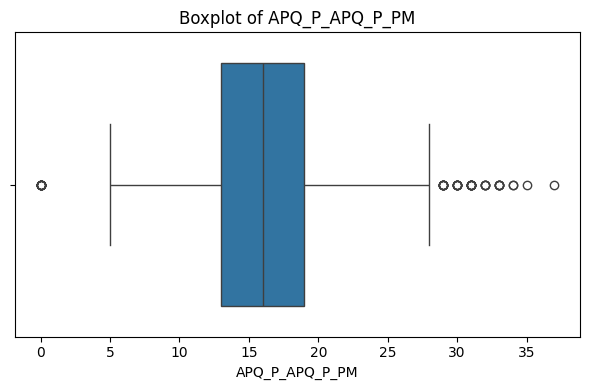

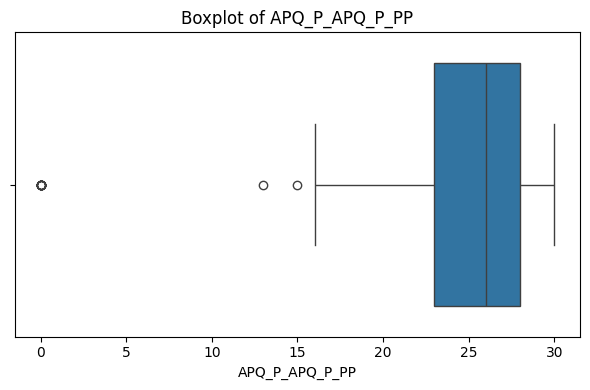

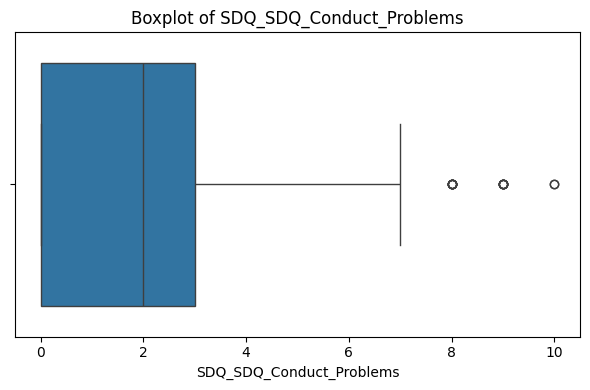

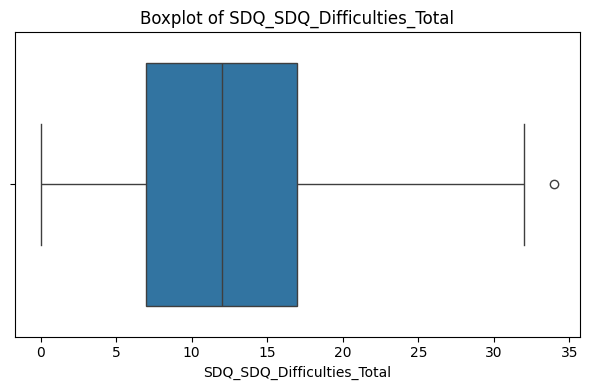

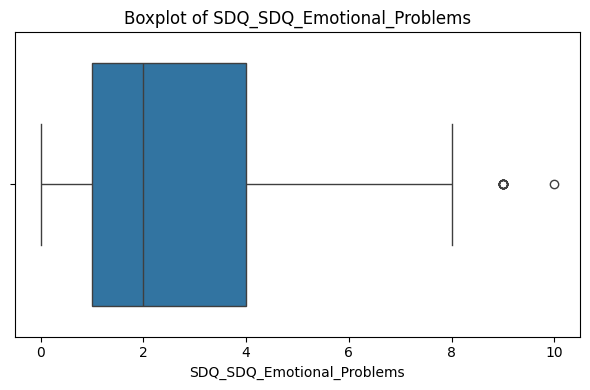

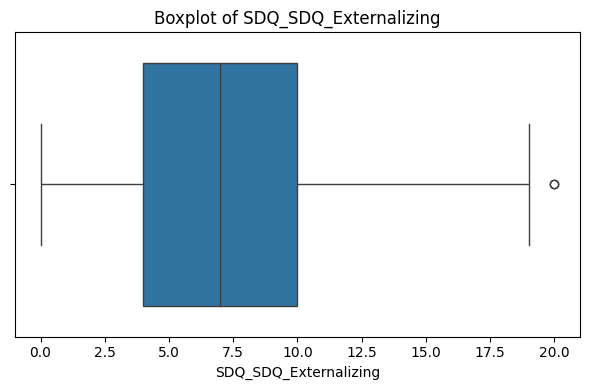

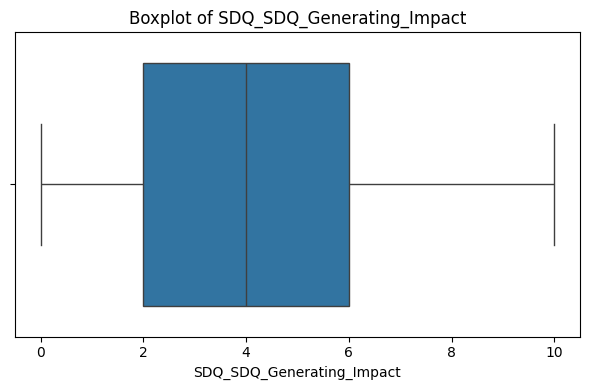

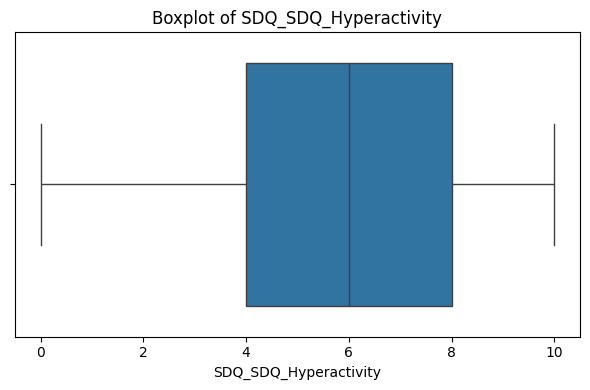

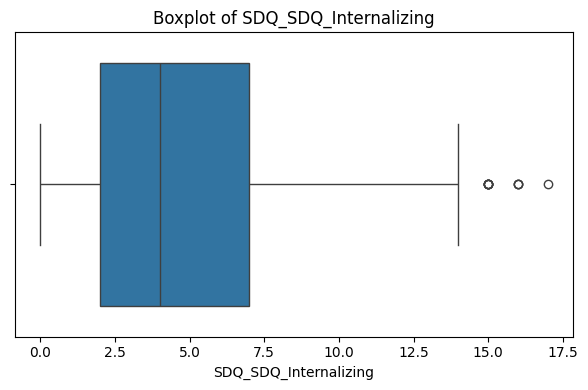

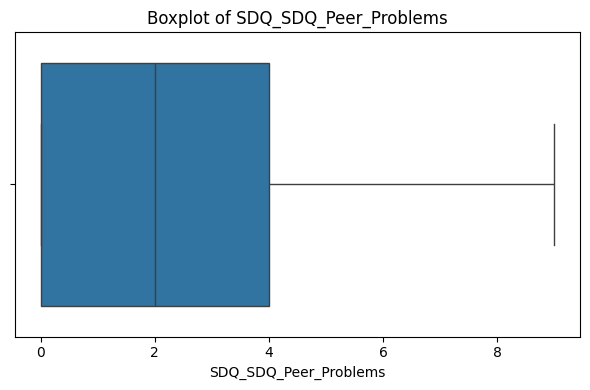

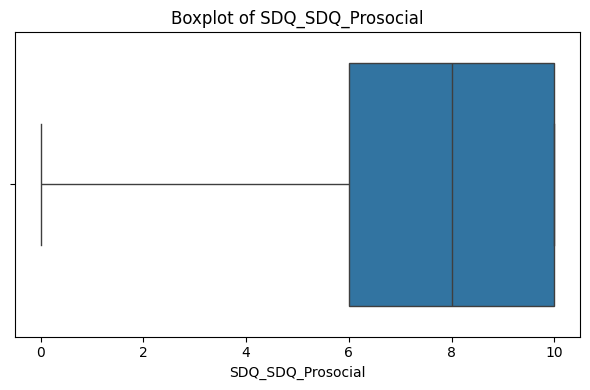

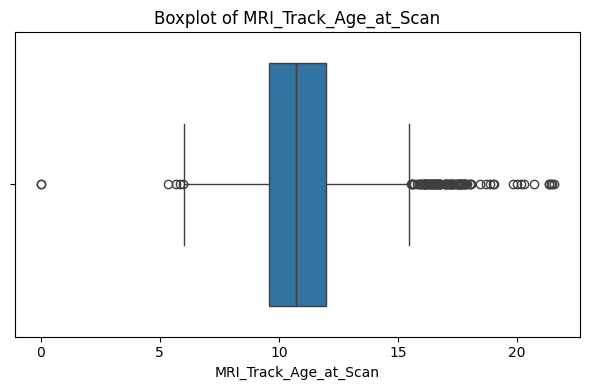

In [ ]:
numerical_cols = metadata_a.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=metadata_a[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# # Plot Boxplots
# plt.figure(figsize=(15, 8))
# metadata_a.boxplot(rot=90)  # Rotate labels for better visibility
# plt.title("Boxplot of Metadata A Numerical Features")
# plt.xlabel("Features")
# plt.ylabel("Values")
# plt.show()

### Problem with outliers:
#### Solution

- If you just want to reduce the influence of outliers, Yeo-Johnson is enough.
- If you want to fully remove extreme values, use Z-score or IQR.
- If you want to cap extreme values but not remove them, use Winsorization.

# Will decide to solve this based on model selection

### A: Countplot for all "Categorical" Features

📊 For categorical variables:

- Plotting Bar plots for the features except participant_id as it is unique.

- As it is a mixture of ordinal (rank) and nominal data, box plot is not good because the distribution can be seen exactly from the bar (count) box.

- If it is only ordinal (rank), box plot is good.

In [ ]:
metadata_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1213 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [ ]:
for col in metadata_b.columns:
    print(f"Value counts for column: {col}")
    print(metadata_b[col].value_counts())
    print("-" * 50)

Value counts for column: participant_id
participant_id
k8HhHnnu2wmt    1
UmrK0vMLopoR    1
CPaeQkhcjg7d    1
Nb4EetVPm3gs    1
p4vPhVu91o4b    1
               ..
Svgloe9AW5R9    1
4cwPd7JVlpF5    1
puLkdUroSab1    1
VDu0H10c0r3f    1
ZT1SHZIQOjfl    1
Name: count, Length: 1213, dtype: int64
--------------------------------------------------
Value counts for column: Basic_Demos_Enroll_Year
Basic_Demos_Enroll_Year
2018    415
2019    312
2017    254
2016    191
2015     36
2020      5
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Basic_Demos_Study_Site
Basic_Demos_Study_Site
1    652
3    430
4    120
2     11
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: PreInt_Demos_Fam_Child_Ethnicity
PreInt_Demos_Fam_Child_Ethnicity
0.0    809
1.0    296
2.0     77
3.0     31
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: PreInt_Demos_

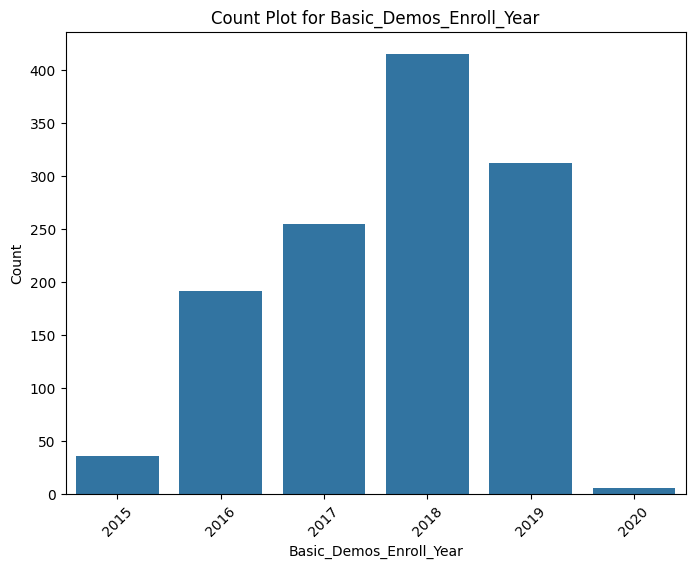

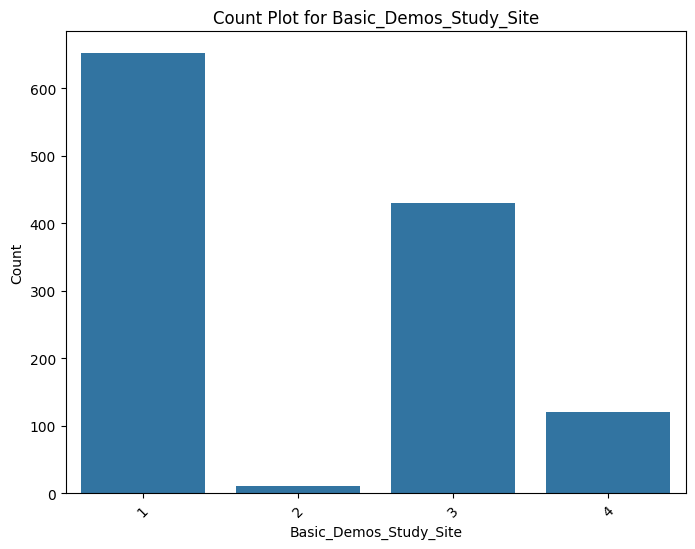

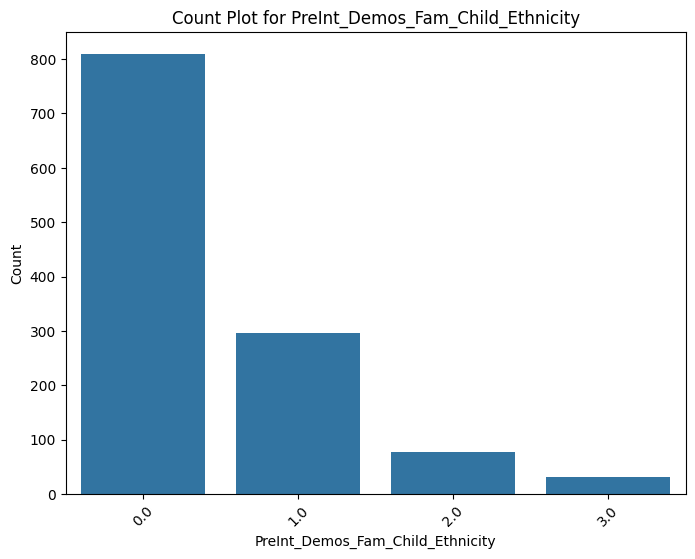

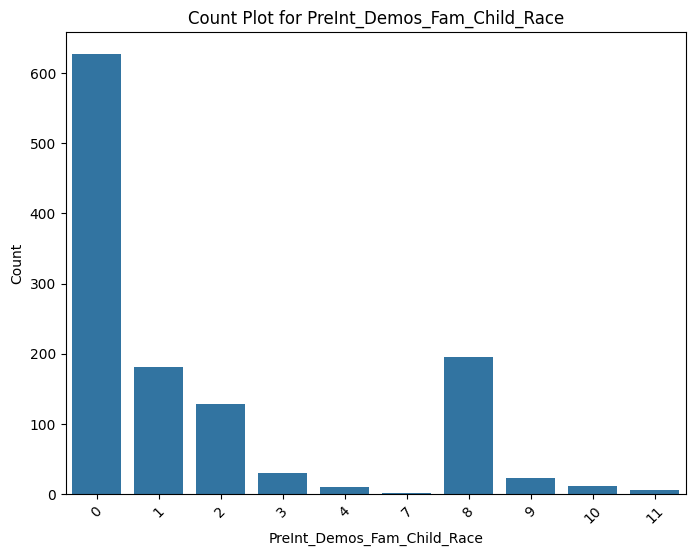

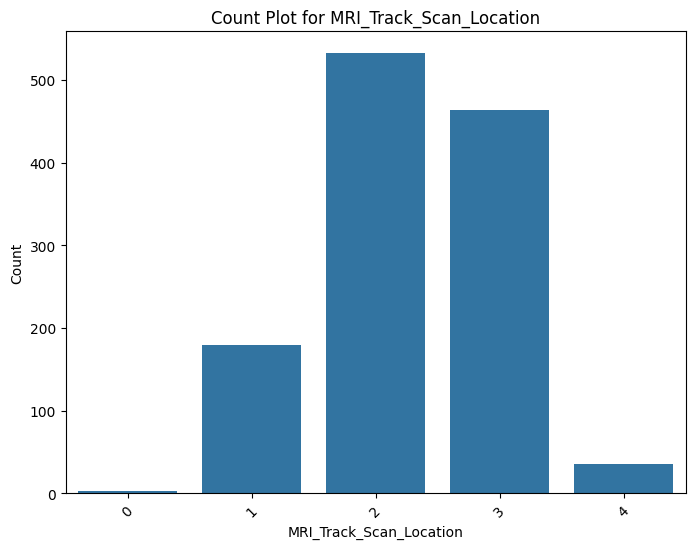

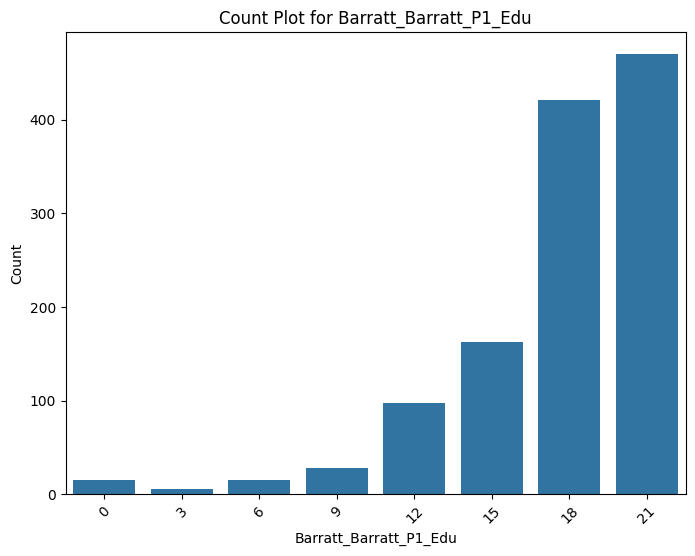

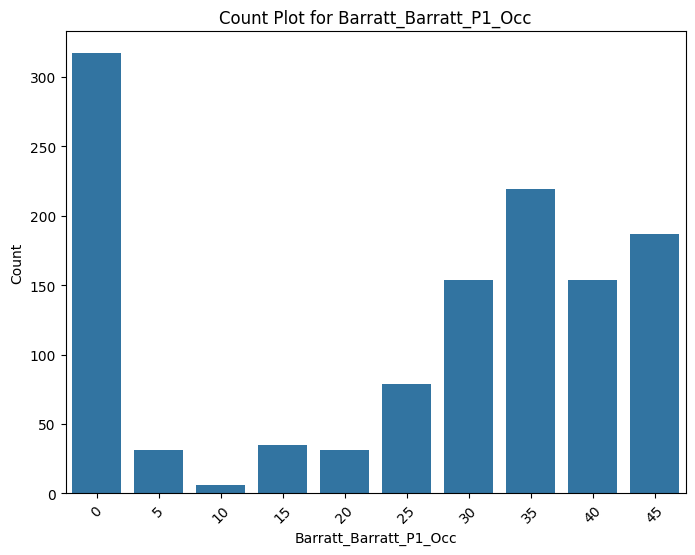

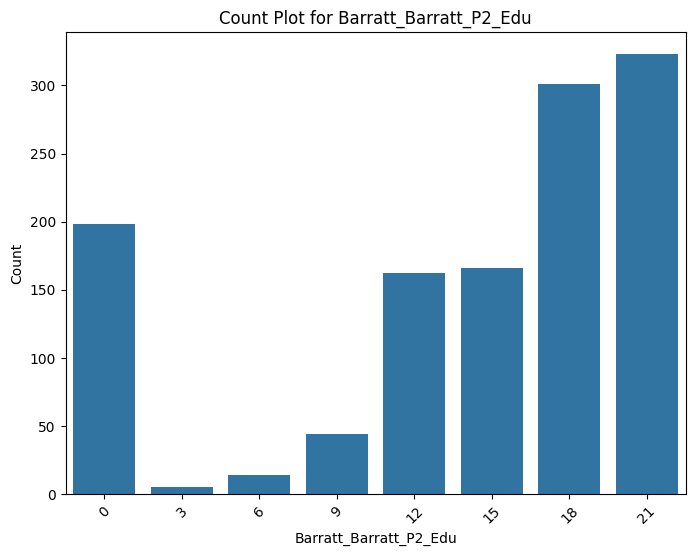

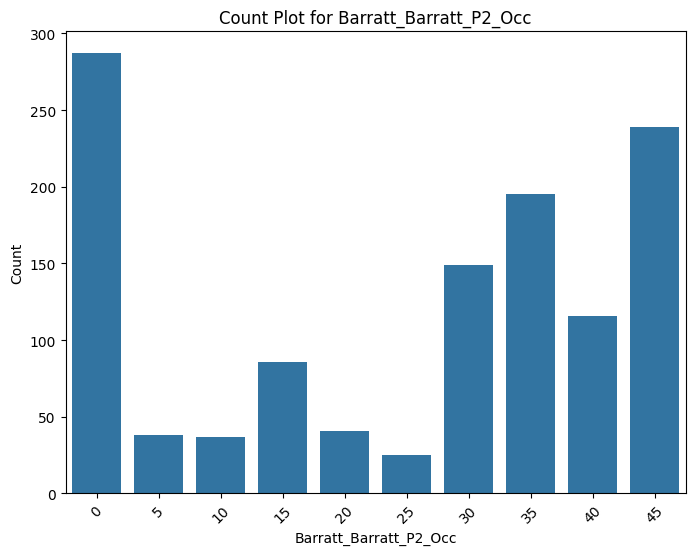

In [ ]:
# Generate bar plots (count plots) for each categorical column
categorical_cols = [col for col in metadata_b.columns if col != 'participant_id']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=metadata_b[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

#### The categorical data are not in object type, they are in numerical types like float and int. Only one type is in Object!



#### Label Encoder

- The categories have a logical order (e.g., Education Level: Primary < High School < University).
- To use with models that understand ordinal relationships, such as Decision Trees, Random Forests, or Gradient Boosting.
- Note: No need to use label encoder for the Target as they are in 0 or 1 format.

#### One-hot encoding when:

-  The categorical values have no ordinal relationship (e.g., Ethnicity, Gender, Marital Status).
-  To use with models like Linear Regression, Logistic Regression, or Neural Networks, where categorical relationships are not inherently understood.
- The number of unique categories is relatively small (e.g., < 20).

### No need either of these as they are all coming in 0 and 1 or in number

### B. Bivariate Analysis (Feature-to-Feature Relationships)
📌 Metadata A and Metadata B:

- Correlation matrix (Can see the strongly correlated faeatures and may be remove one of them for the feature Engineering. Read the description for the domain understanding.)


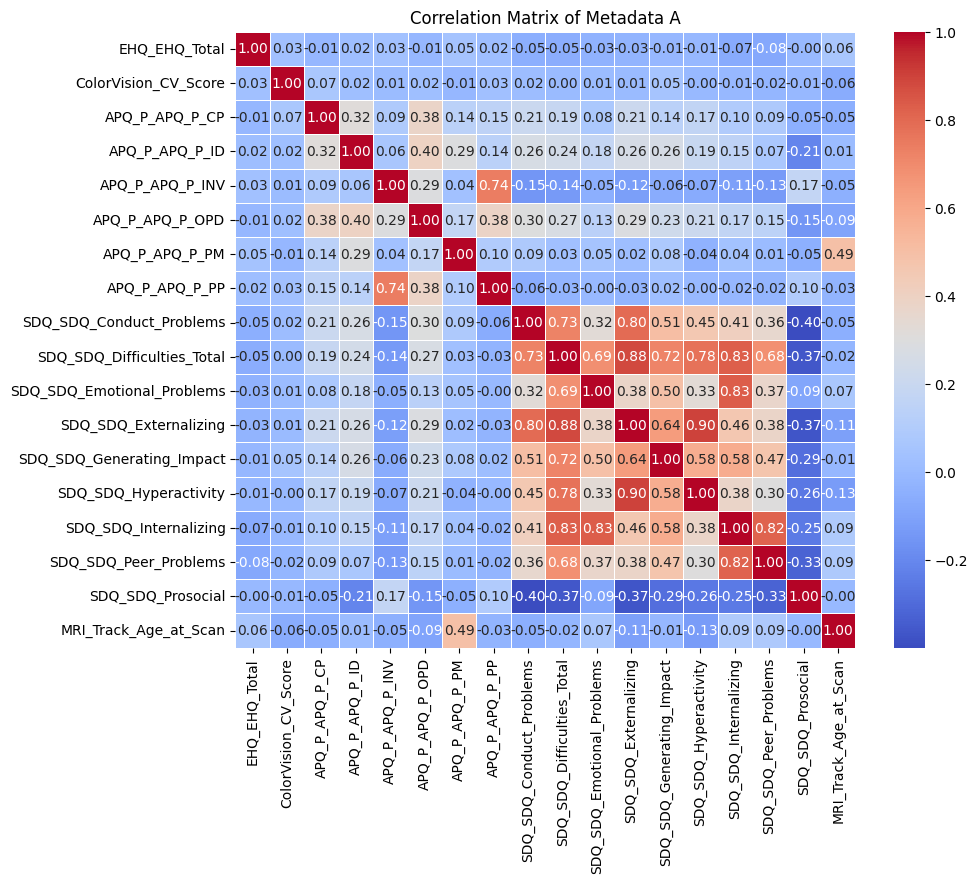

In [ ]:
# Correlation matrix
numerical_metadata_a = metadata_a.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(numerical_metadata_a.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Metadata A")
plt.show()


In [ ]:
corr_matrix = numerical_metadata_a.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Filter pairs with correlation higher than 0.8 or lower than -0.8
high_corr_pairs = corr_matrix.where(mask).stack().reset_index()

# Filter pairs with correlation higher than 0.8 or lower than -0.8
high_corr_pairs = high_corr_pairs[(high_corr_pairs[0] > 0.8) | (high_corr_pairs[0] < -0.8)]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] != 1.0]

# Display feature pairs and their correlation values
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_corr_pairs)

                      Feature 1              Feature 2  Correlation
128  SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Externalizing     0.880004
131  SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Internalizing     0.826949
139  SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Internalizing     0.833418
145       SDQ_SDQ_Externalizing  SDQ_SDQ_Hyperactivity     0.901635
162       SDQ_SDQ_Internalizing  SDQ_SDQ_Peer_Problems     0.819531


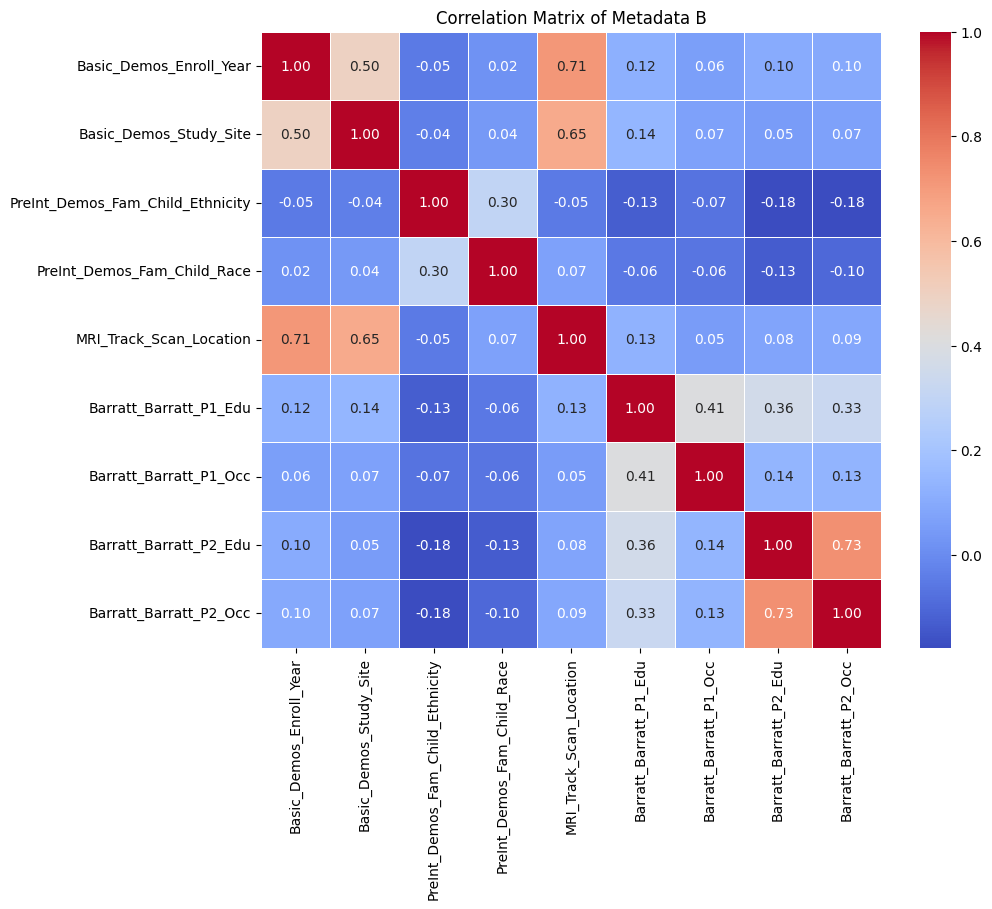

In [ ]:
# Correlation matrix
categorical_metadata_b = metadata_b.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(categorical_metadata_b.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Metadata B")
plt.show()


In [ ]:
# Calculate the correlation matrix for categorical_metadata_b
corr_matrix_b = categorical_metadata_b.corr()

# Mask the upper triangle (optional, to avoid redundant pairs)
mask_b = np.triu(np.ones_like(corr_matrix_b, dtype=bool))

# Filter pairs with correlation higher than 0.8 or lower than -0.8
high_corr_pairs_b = corr_matrix_b.where(mask_b).stack().reset_index()

# Filter pairs with correlation higher than 0.8 or lower than -0.8
high_corr_pairs_b = high_corr_pairs_b[(high_corr_pairs_b[0] > 0.8) | (high_corr_pairs_b[0] < -0.8)]
high_corr_pairs_b = high_corr_pairs_b[high_corr_pairs_b[0] != 1.0]

# Display feature pairs and their correlation values
high_corr_pairs_b.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_corr_pairs_b)


Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [ ]:
# # Scatter plots for all numerical pairs
# num_cols = numerical_metadata_a.columns

# for i in range(len(num_cols)):
#     for j in range(i+1, len(num_cols)):
#         plt.figure(figsize=(6,4))
#         sns.scatterplot(x=numerical_metadata_a[num_cols[i]], y=numerical_metadata_a[num_cols[j]])
#         plt.title(f"Scatter Plot: {num_cols[i]} vs {num_cols[j]}")
#         plt.show()



📌 For FMRI_Matrices:

Visualizing 19,901 columns individually is unrealistic

- Take a sample subset of columns and plot histograms
- Use summary statistics to check for skewness

- Most of the features 19862 features are normally distribute and only 35 Right Skew and 3 Left skew are found.
- Based on this finding, I believe it is unnecessy to do extra transformation for the model training.

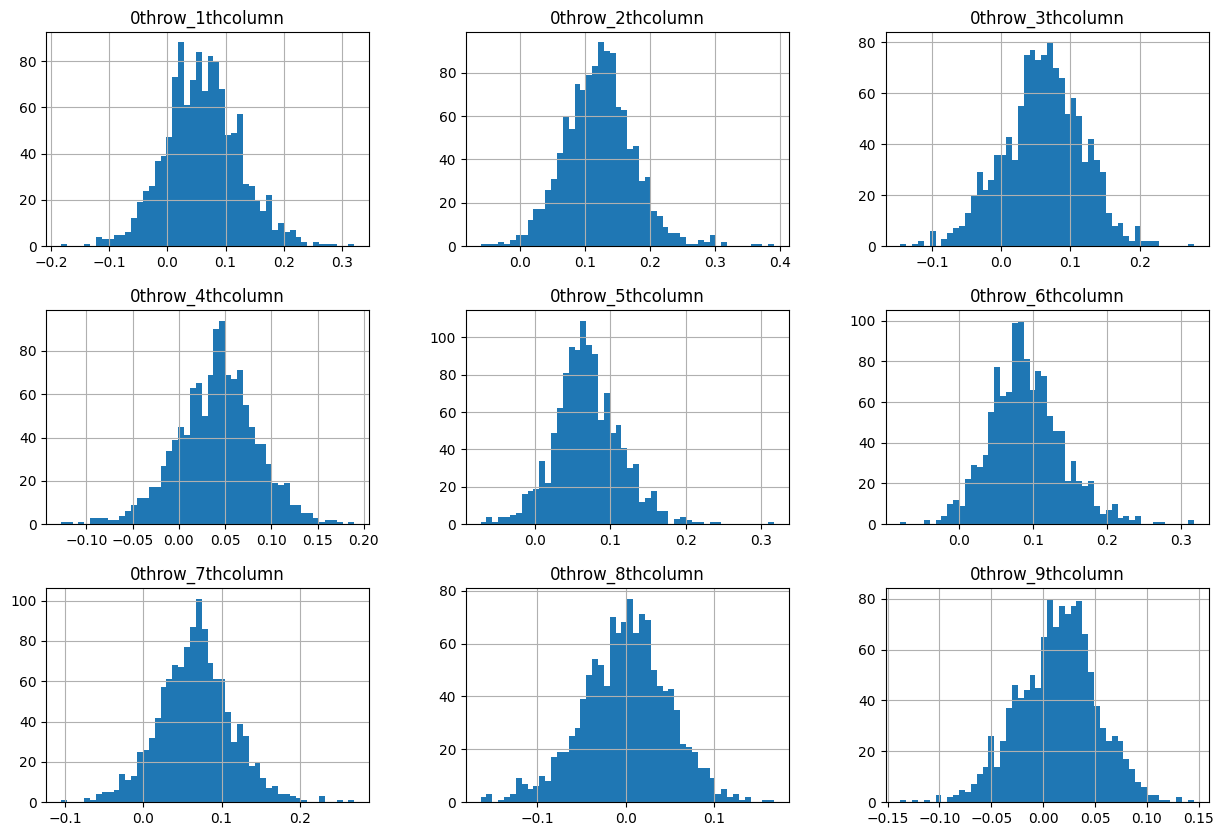

In [ ]:

sample_columns = fmri_matrices.columns[1:10]  # Select first 10 fMRI features (excluding participant_id)
fmri_matrices[sample_columns].hist(figsize=(15, 10), bins=50)
plt.show()

In [ ]:
fmri_matrices.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [ ]:
fmri_matrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


In [ ]:
numerical_cols = fmri_matrices.select_dtypes(include=['int64', 'float64']).columns
# numerical_cols = [col for col in numerical_cols if col != "participant_id"]  # Remove participant_id

skewness_values = fmri_matrices[numerical_cols].skew().sort_values()

# Categorize into Left Skewed, Right Skewed, and Normal
left_skewed = skewness_values[skewness_values < -0.5]
right_skewed = skewness_values[skewness_values > 0.5]
normal_skew = skewness_values[(skewness_values >= -0.5) & (skewness_values <= 0.5)]

# Print top 10 from each category
print("\n Top 10 Left-Skewed Features (Skewness < -0.5):")
print(left_skewed.head(10))
print(f"\n Total: {len(left_skewed)}")

print("\n Top 10 Right-Skewed Features (Skewness > 0.5):")
print(right_skewed.tail(10))  # Using tail() to get highest values
print(f"\n Total: {len(right_skewed)}")

print("\n Top 10 Normally Distributed Features (-0.5 <= Skewness <= 0.5):")
print(normal_skew.sample(10))  # Random 10 since normal ones are not ordered
print(f"\n Total: {len(normal_skew)}")



 Top 10 Left-Skewed Features (Skewness < -0.5):
9throw_106thcolumn    -0.681590
11throw_109thcolumn   -0.557406
10throw_108thcolumn   -0.502661
dtype: float64

 Total: 3

 Top 10 Right-Skewed Features (Skewness > 0.5):
96throw_194thcolumn     0.692738
18throw_84thcolumn      0.730863
112throw_137thcolumn    0.765402
18throw_37thcolumn      0.793650
85throw_98thcolumn      0.825043
7throw_9thcolumn        0.858482
9throw_108thcolumn      0.876481
26throw_136thcolumn     0.947537
106throw_108thcolumn    1.023073
74throw_105thcolumn     1.024060
dtype: float64

 Total: 35

 Top 10 Normally Distributed Features (-0.5 <= Skewness <= 0.5):
29throw_64thcolumn     -0.042315
81throw_111thcolumn     0.035695
55throw_106thcolumn    -0.034205
190throw_192thcolumn    0.056626
38throw_123thcolumn    -0.044633
143throw_147thcolumn    0.082733
1throw_107thcolumn     -0.005364
20throw_141thcolumn    -0.099880
16throw_106thcolumn    -0.077745
86throw_159thcolumn    -0.041816
dtype: float64

 Total: 198

📌 For Labels:

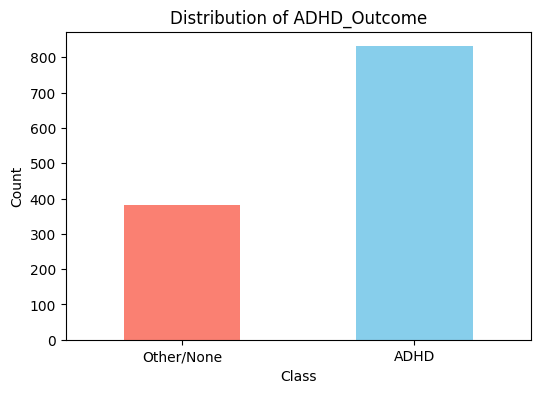

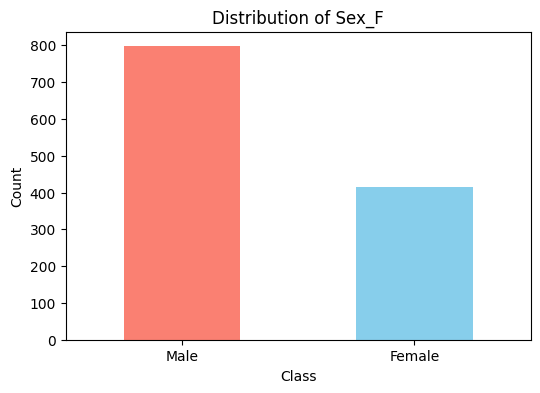

In [ ]:
columns_to_plot = ["ADHD_Outcome", "Sex_F"]

xtick_labels = {
    "ADHD_Outcome": {0: "Other/None", 1: "ADHD"},
    "Sex_F": {0: "Male", 1: "Female"}
}

for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    targets[col].value_counts().sort_index().plot(kind='bar', color=['salmon', 'skyblue'])
    plt.title(f"Distribution of {col}")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1], labels=xtick_labels[col].values(), rotation=0)
    plt.show()

## 4️⃣ Handling Outliers & Transformations

💡 Goal: Detect and manage extreme values for better model performance

✅ Steps:

- Detect outliers using box plots or Z-score (scipy.stats.zscore()).
- Remove or cap extreme values (df[df['column'] < threshold]).
- Apply transformations if needed:
-- Log transformation for skewed data.
-- Scaling (MinMaxScaler, StandardScaler).

## 4️⃣ Feature Engineering & Encoding

💡 Goal: Transform data into a format suitable for machine learning

✅ Steps:

📌 Encoding categorical variables

- One-hot encoding (pd.get_dummies(df, columns=['categorical_column'])).
- Label encoding (sklearn.preprocessing.LabelEncoder()).

📌 Feature Engineering

- Select the best features from the MetadataA and MetadataB ((e.g., removing low variance features))
- PCA only works on Numerical Features (I dont think we need to use PCA anyway for Meta A and B)
- Use only few features as you are now combining with the high dimensional Functional MRI matrices dataset.
- Check heatmap.
- Genuine understanding of the dataset

📌 Dimensionality Reduction (if needed)

- PCA (Principal Component Analysis) for high-dimensional data.

## 5️⃣ Handling Outliers & Transformations

💡 Goal: Detect and manage extreme values for better model performance

✅ Steps:

- Detect outliers using box plots or Z-score (scipy.stats.zscore()).
- Remove or cap extreme values (df[df['column'] < threshold]).
- Apply transformations if needed:
-- Log transformation for skewed data.
-- Scaling (MinMaxScaler, StandardScaler).

## 6️⃣ Splitting Data for Training & Model Preparation

💡 Goal: Prepare dataset for modeling

✅ Steps:

- Check the documentation from the Professor. Do accordingly.
- Combine the dataset using the participant_id
- Separate features and target (X = df.drop(columns=['target']), y = df['target']).
- Train-test split (train_test_split(X, y, test_size=0.2, random_state=42)).
- Check class distribution (for imbalanced data).
- Balance data if necessary (SMOTE, oversampling).

Model Choosing